In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


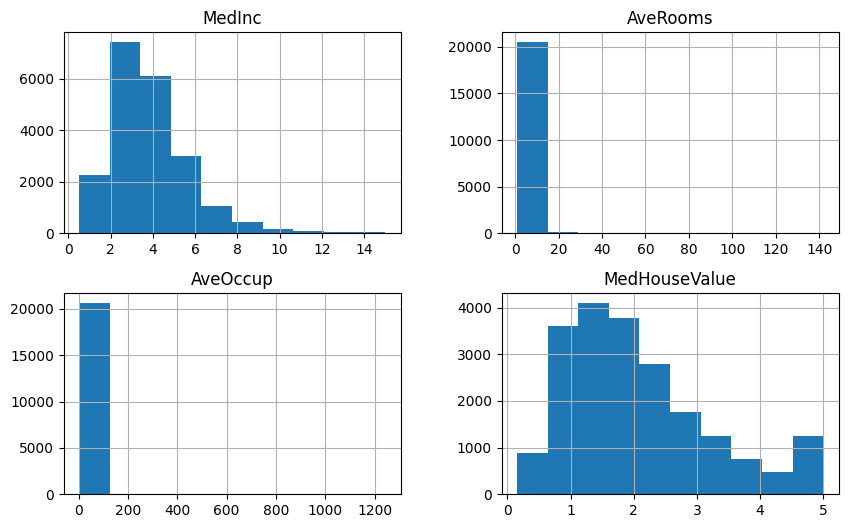

In [3]:
df[['MedInc', 'AveRooms', 'AveOccup', 'MedHouseValue']].hist(figsize=(10,6))
plt.show()


In [4]:
X = df[['MedInc', 'AveRooms', 'AveOccup']]   # selected relevant numerical features
y = df['MedHouseValue']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [7]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def predict(X, weights):
    return X.dot(weights)

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)


In [8]:
def batch_gradient_descent(X, y, lr=0.1, epochs=50):
    m, n = X.shape
    weights = np.zeros((n,1))
    losses = []

    for epoch in range(epochs):
        gradients = -(2/m) * X.T.dot(y - X.dot(weights))
        weights -= lr * gradients
        y_pred = X.dot(weights)
        losses.append(mse_loss(y, y_pred))
    return weights, losses


In [9]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=50):
    m, n = X.shape
    weights = np.zeros((n,1))
    losses = []

    for epoch in range(epochs):
        for i in range(m):
            rand_i = np.random.randint(m)
            xi = X[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]
            gradients = -2 * xi.T.dot(yi - xi.dot(weights))
            weights -= lr * gradients
        y_pred = X.dot(weights)
        losses.append(mse_loss(y, y_pred))
    return weights, losses



In [10]:
def mini_batch_gradient_descent(X, y, lr=0.05, epochs=50, batch_size=64):
    m, n = X.shape
    weights = np.zeros((n,1))
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = -(2/xi.shape[0]) * xi.T.dot(yi - xi.dot(weights))
            weights -= lr * gradients
        y_pred = X.dot(weights)
        losses.append(mse_loss(y, y_pred))
    return weights, losses


In [11]:
epochs = 50

w_bgd, loss_bgd = batch_gradient_descent(X_train_b, y_train, lr=0.1, epochs=epochs)
w_sgd, loss_sgd = stochastic_gradient_descent(X_train_b, y_train, lr=0.01, epochs=epochs)
w_mbgd, loss_mbgd = mini_batch_gradient_descent(X_train_b, y_train, lr=0.05, epochs=epochs, batch_size=64)


/tmp/ipython-input-1964845857.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred)**2)


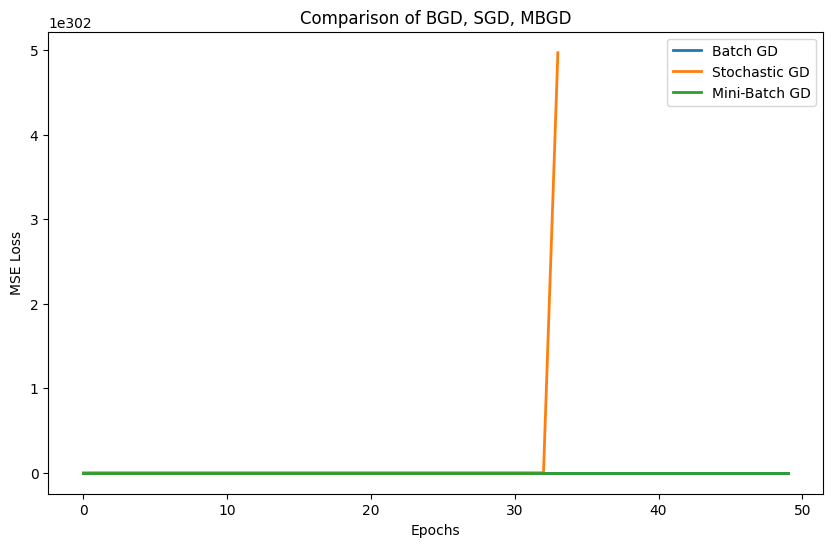

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), loss_bgd, label="Batch GD", linewidth=2)
plt.plot(range(epochs), loss_sgd, label="Stochastic GD", linewidth=2)
plt.plot(range(epochs), loss_mbgd, label="Mini-Batch GD", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Comparison of BGD, SGD, MBGD")
plt.legend()
plt.show()


In [13]:
print("Final Training Losses:")
print(f"Batch GD: {loss_bgd[-1]:.4f}")
print(f"Stochastic GD: {loss_sgd[-1]:.4f}")
print(f"Mini-Batch GD: {loss_mbgd[-1]:.4f}")

Final Training Losses:
Batch GD: 0.6890
Stochastic GD: inf
Mini-Batch GD: 1053630317121660282213337702923996809276615926637611887610892011309726793707413966877999472776924802890632683989064667591443823872462658357995243569152.0000
